In [2]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import seaborn as sns

from matplotlib import pyplot as plt


In [4]:
time_resolution = 1

data_path = '../network_data'+str(time_resolution)+'/'

c_path = '../network_data'+str(time_resolution)+'/commits/'
e_path = '../network_data'+str(time_resolution)+'/emails/'
mix_path = '../network_data'+str(time_resolution)+'/mix/'
#c_path = './network_data/commits/'

df_tech_overlaps = pd.read_csv("../result_csv/tech_overlaps"+str(time_resolution)+".csv")
df_social_overlaps = pd.read_csv("../result_csv/social_overlaps"+str(time_resolution)+".csv")
df_mix_overlaps = pd.read_csv("../result_csv/mix_overlaps"+str(time_resolution)+".csv")

projects = os.listdir(c_path)
project_names = [x.split('__')[0] for x in projects]
project_names_tech = pd.Series(project_names).drop_duplicates().values

projects = os.listdir(e_path)
project_names = [x.split('__')[0] for x in projects]
project_names_social = pd.Series(project_names).drop_duplicates().values

In [5]:
all_graduated = np.load('../all_graduated.npy').tolist()
#all_graduated = [x.lower() for x in all_graduated]
all_retired = np.load('../all_retired.npy').tolist()
#all_retired = [x.lower() for x in all_retired]

In [24]:
df_tech_overlaps.columns

Index(['Kitty', 'Tika', 'Lucene.NET', 'Pivot', 'Slider', 'Streams', 'Gossip',
       'Unomi', 'ODF Toolkit', 'Tephra',
       ...
       'Wicket', 'Geode', 'WebWork 2', 'Ignite', 'Crunch', 'CommonsRDF',
       'Directory', 'Kabuki', 'Concerted', 'Traffic Server'],
      dtype='object', length=263)

In [25]:
df_tech_vectors = df_tech_overlaps[:24].replace(-1.0,0.0).values.T

In [26]:
df_tech_vectors.shape

(263, 24)

In [27]:
df_social_vectors = df_social_overlaps[:24].replace(-1.0,0.0).values.T

In [28]:
df_social_vectors.shape

(272, 24)

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage

cluster_tech = linkage(df_tech_vectors, 'ward')

In [41]:
cluster_tech

array([[152.        , 232.        ,   0.        ,   2.        ],
       [245.        , 263.        ,   0.        ,   3.        ],
       [258.        , 264.        ,   0.        ,   4.        ],
       ...,
       [519.        , 521.        ,   5.42646154, 112.        ],
       [517.        , 522.        ,   7.38343841, 180.        ],
       [520.        , 523.        ,   8.29952681, 263.        ]])

In [36]:
def fancy_dendrogram(*args, **kwargs):
	max_d = kwargs.pop('max_d', None)
	if max_d and 'color_threshold' not in kwargs:
		kwargs['color_threshold'] = max_d
	annotate_above = kwargs.pop('annotate_above', 0)

	ddata = dendrogram(*args, **kwargs)

	if not kwargs.get('no_plot', False):
		plt.title('Hierarchical Clustering Dendrogram (truncated)')
		plt.xlabel('sample index or (cluster size)')
		plt.ylabel('distance')
		for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
			x = 0.5 * sum(i[1:3])
			y = d[1]
			if y > annotate_above:
				plt.plot(x, y, 'o', c=c)
				plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')
		if max_d:
			plt.axhline(y=max_d, c='k')
	return ddata

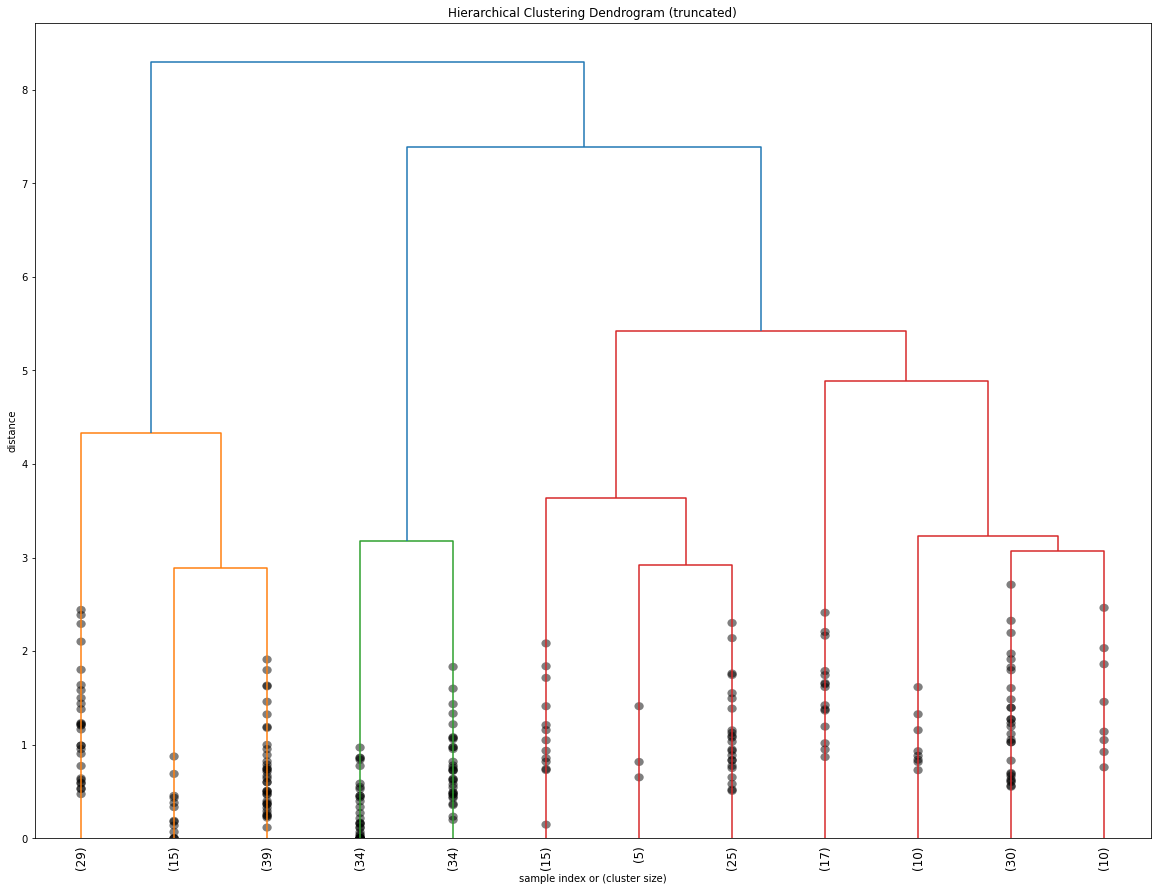

In [64]:
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
#dendrogram(cluster_tech, truncate_mode='lastp', p=12, show_leaf_counts=False, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
fancy_dendrogram(cluster_tech, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10)
plt.show()

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage

cluster_social = linkage(df_social_vectors, 'ward')

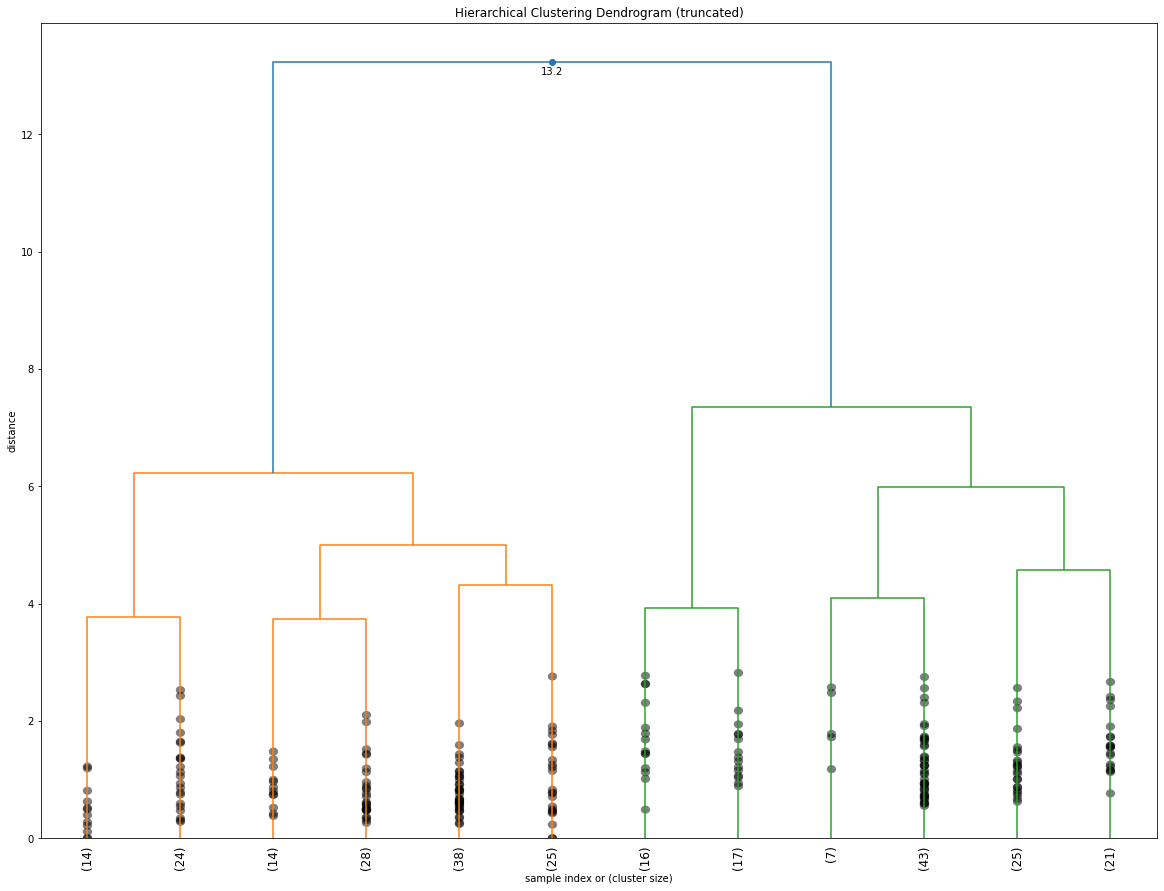

In [51]:
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
#dendrogram(cluster_social, truncate_mode='lastp', p=12, show_leaf_counts=False, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
fancy_dendrogram(cluster_social, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10)
plt.show()

In [80]:
from scipy.cluster.hierarchy import fcluster
k = 4
#clusters_result_tech = fcluster(cluster_tech, k, criterion='maxclust')
clusters_result_tech = fcluster(cluster_tech, k, criterion='distance')
print(clusters_result_tech)

[2 1 1 4 6 5 6 6 2 6 5 5 6 6 4 6 1 3 4 1 4 5 1 6 5 3 1 6 3 4 5 6 4 2 5 2 1
 1 6 2 5 5 6 6 1 1 3 2 3 6 3 6 1 5 3 2 2 1 6 2 6 6 2 1 2 6 6 6 1 1 6 4 6 6
 3 4 6 1 3 3 6 3 2 4 4 4 1 6 4 1 2 3 3 2 6 3 3 1 2 4 3 5 6 6 1 6 5 6 4 6 2
 6 2 6 1 1 4 3 4 3 6 2 6 4 1 3 3 2 4 4 6 3 2 4 6 1 3 6 3 3 3 5 2 4 2 4 2 3
 2 3 2 6 2 4 3 5 3 1 6 4 3 1 3 3 2 2 3 5 3 6 3 2 2 4 3 3 4 2 2 6 4 4 3 4 2
 4 3 4 4 4 6 4 3 5 1 3 3 3 3 4 1 3 4 1 3 2 3 2 3 6 4 6 4 2 3 5 4 6 6 2 2 6
 3 3 3 4 3 3 4 3 2 3 2 2 2 2 3 4 4 2 2 3 4 2 3 2 4 3 2 2 3 2 3 3 3 2 3 2 2
 3 3 2 3]


In [63]:
from scipy.cluster.hierarchy import fcluster
k = 4.7
#clusters_result_tech = fcluster(cluster_tech, k, criterion='maxclust')
clusters_result_social = fcluster(cluster_social, k, criterion='distance')
print(clusters_result_social)

[6 3 5 1 4 4 5 6 6 5 5 3 3 4 5 6 4 6 4 1 6 6 4 4 6 4 4 5 1 5 4 3 4 3 3 5 5
 6 3 6 5 1 1 5 1 2 3 3 5 6 3 5 2 4 6 3 5 6 6 4 4 1 3 1 2 5 3 5 4 1 5 3 5 3
 3 5 6 3 5 6 1 2 5 5 3 4 6 6 4 4 6 6 3 1 6 2 2 6 3 6 3 4 3 6 2 6 5 6 6 5 5
 5 5 6 1 3 1 2 6 4 2 4 5 4 6 3 4 3 3 3 2 6 3 4 6 6 5 3 6 3 4 6 2 5 3 4 3 2
 3 2 3 1 5 3 5 1 1 2 1 4 4 2 4 4 4 3 5 2 1 2 3 3 5 6 3 3 5 6 5 4 3 5 6 4 3
 1 2 2 2 2 3 2 3 1 5 2 6 1 1 5 2 1 3 2 2 2 2 5 5 2 2 3 1 1 6 3 6 2 5 3 6 5
 2 1 1 3 1 3 5 3 2 2 1 2 3 2 1 5 5 5 3 2 6 3 2 3 1 5 1 3 6 6 5 6 2 3 5 3 1
 1 1 2 1 3 2 3 1 3 2 3 1 3]


In [91]:
df_tech_results = pd.DataFrame(np.c_[df_tech_vectors,clusters_result_tech])
df_tech_results.index = df_tech_overlaps.columns
df_tech_results = df_tech_results.rename(columns={24:'cluster'})

In [92]:
df_tech_results

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,cluster
Kitty,1.000000,0.500000,0.000000,0.333333,0.600000,0.666667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,2.0
Tika,1.000000,0.000000,0.000000,0.000000,0.571429,0.252632,0.137931,0.437500,0.062500,0.250000,...,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.0
Lucene.NET,1.000000,0.100000,0.227642,0.341463,0.520000,0.040000,0.126214,0.041237,0.000000,0.000000,...,0.026087,0.017391,0.155963,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.0
Pivot,0.594595,0.344444,0.640741,0.460000,0.392000,0.414487,0.327103,0.405634,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,4.0
Slider,0.218182,0.227273,0.345679,0.354497,0.317460,0.337079,0.100000,0.100000,0.295455,0.253731,...,0.200000,0.133333,0.333333,0.151515,0.233333,0.333333,0.117647,0.235294,0.16,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CommonsRDF,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,2.0
Directory,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,3.0
Kabuki,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,3.0
Concerted,1.000000,0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,2.0


In [93]:
df_tech_plot = pd.DataFrame

In [100]:
df_tech_plot = df_tech_results.groupby('cluster').agg('median')

<AxesSubplot:>

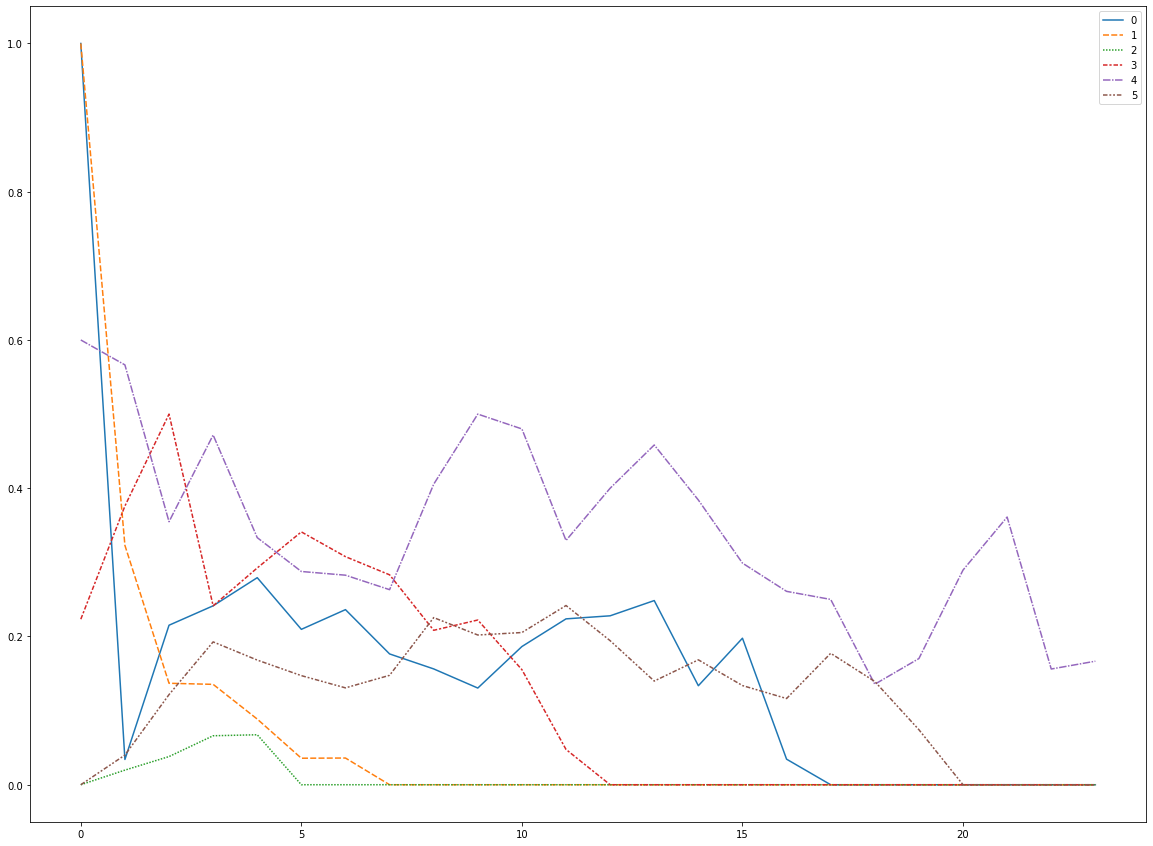

In [103]:
plt.figure(figsize=(20, 15))
sns.lineplot(data= df_tech_plot.values.T)

In [105]:
df_social_results = pd.DataFrame(np.c_[df_social_vectors,clusters_result_social])
df_social_results.index = df_social_overlaps.columns
df_social_results = df_social_results.rename(columns={24:'cluster'})
df_social_plot = df_social_results.groupby('cluster').agg('median')

<AxesSubplot:>

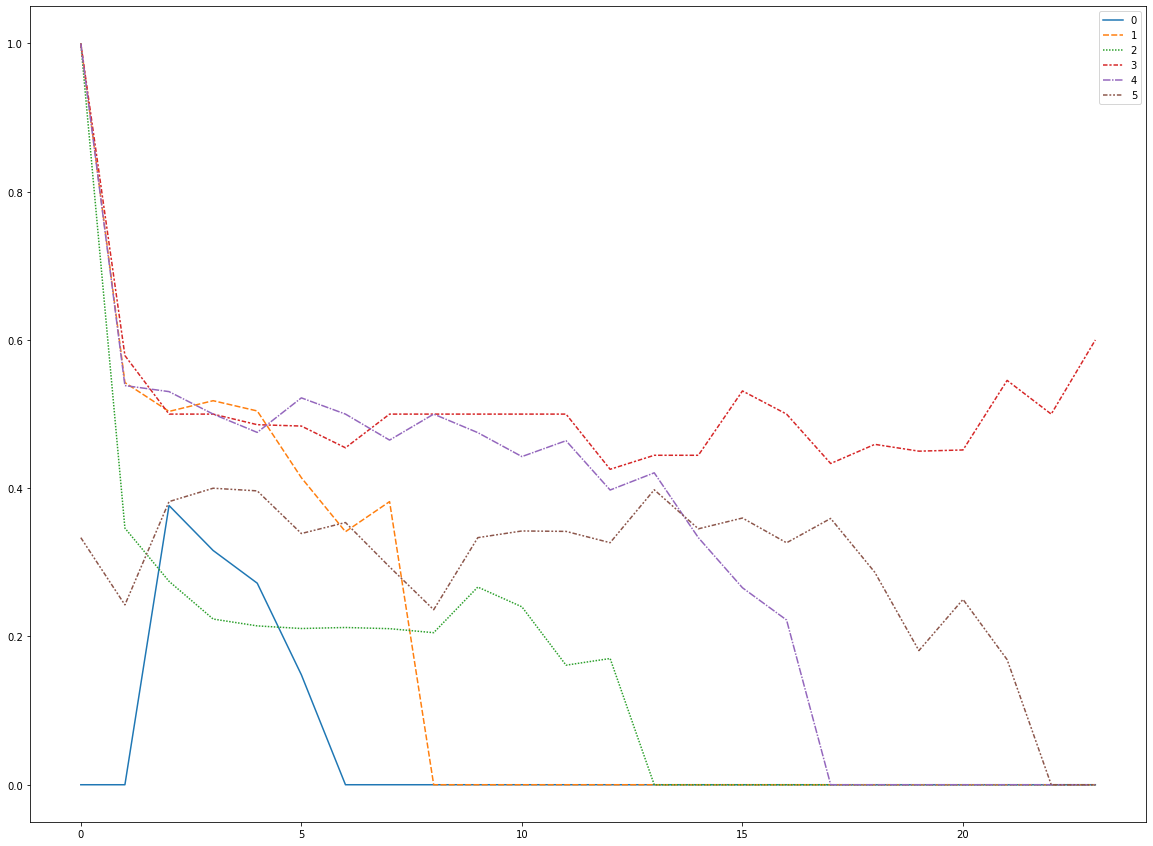

In [106]:
plt.figure(figsize=(20, 15))
sns.lineplot(data= df_social_plot.values.T)